## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.
C:\Users\ian\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\ian\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\ian\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\ian\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:529: Fu

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation='relu', name='hidden_layer'+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation='relu', name='hidden_layer'+str(i+1))(x)
        
    out = keras.layers.Dense(units=10, activation='softmax', name='output')(x)
        
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    
    return model

In [7]:
"""Code Here
設定超參數
"""
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95

In [8]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session()
    print('Experiment With LR = %.6f'%(lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=False, momentum=MOMENTUM)
    model.compile(loss='categorical_crossentropy', metrics=['acc'], optimizer=optimizer)
    
    model.fit(x_train,y_train,
             epochs=EPOCHS,
             batch_size=BATCH_SIZE,
             validation_data=(x_test, y_test),
             shuffle=True)
    
    train_loss = model.history.history['loss']
    valid_loss = model.history.history['val_loss']
    train_acc  = model.history.history['acc']
    valid_acc  = model.history.history['val_acc']
    
    exp_name_tag = 'exp-lr-%s'% str(lr)
    results[exp_name_tag] = {'train-loss':train_loss,
                             'valid-loss':valid_loss,
                             'train-acc':train_acc,
                             'valid-acc':valid_acc}

Experiment With LR = 0.100000
Instructions for updating:
Colocations handled automatically by placer.
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Instructions 

50000/50000 [==============================] - 9s 171us/step - loss: 2.1937 - acc: 0.1612 - val_loss: 2.1672 - val_acc: 0.1721
Epoch 49/50
50000/50000 [==============================] - 8s 167us/step - loss: 2.1658 - acc: 0.1689 - val_loss: 2.1713 - val_acc: 0.1662
Epoch 50/50
50000/50000 [==============================] - 8s 157us/step - loss: 2.1591 - acc: 0.1584 - val_loss: 2.1664 - val_acc: 0.1663
Experiment With LR = 0.010000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense

50000/50000 [==============================] - 8s 163us/step - loss: 0.6516 - acc: 0.7671 - val_loss: 1.6907 - val_acc: 0.5341
Epoch 50/50
50000/50000 [==============================] - 9s 177us/step - loss: 0.5940 - acc: 0.7878 - val_loss: 1.7444 - val_acc: 0.5312
Experiment With LR = 0.001000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)             

50000/50000 [==============================] - 7s 140us/step - loss: 0.9697 - acc: 0.6596 - val_loss: 1.3842 - val_acc: 0.5239
Experiment With LR = 0.000100
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
________________________

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 7s 144us/step - loss: 2.3569 - acc: 0.0712 - val_loss: 2.3197 - val_acc: 0.0843
Epoch 2/50
50000/50000 [==============================] - 7s 138us/step - loss: 2.3025 - acc: 0.1175 - val_loss: 2.2860 - val_acc: 0.1508
Epoch 3/50
50000/50000 [==============================] - 7s 149us/step - loss: 2.2754 - acc: 0.1625 - val_loss: 2.2630 - val_acc: 0.1715
Epoch 4/50
50000/50000 [==============================] - 8s 155us/step - loss: 2.2549 - acc: 0.1755 - val_loss: 2.2447 - val_acc: 0.1791
Epoch 5/50
50000/50000 [==============================] - 7s 149us/step - loss: 2.2381 - acc: 0.1871 - val_loss: 2.2291 - val_acc: 0.1875
Epoch 6/50
50000/50000 [==============================] - 7s 145us/step - loss: 2.2233 - acc: 0.1944 - val_loss: 2.2151 - val_acc: 0.1986
Epoch 7/50
50000/50000 [==============================] - 7s 137us/step - loss: 2.2098 - acc: 0.2036 - val_loss: 2.2024 - 

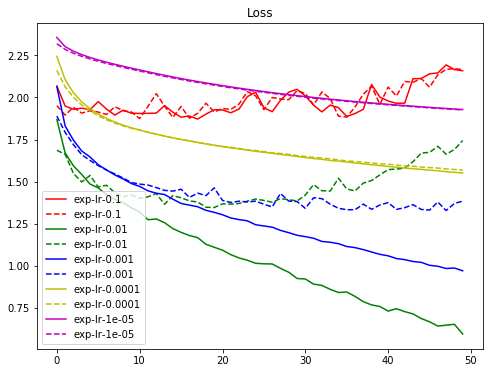

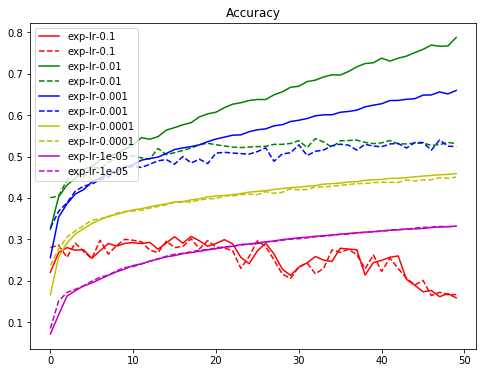

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ['r', 'g', 'b', 'y', 'm', 'k']

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title('Accuracy')
plt.legend()
plt.show()
    